# 分類（Classification）
予め定められた選択肢のうち、どのクラスに属するかを予測すること。

In [1]:
# 必要なライブラリのimport
# 機械学習をする際にはほぼ全て必要となるため、予めimportしておくとよい。

# 配列
import numpy as np 
# データ変換・可視化
import pandas as pd
# 機械学習
import sklearn

# 可視化
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## データ可視化
機械学習を行う前にまずデータを観察することが重要。
* 機械学習をしなくても簡単に解ける可能性
* データに異常値、欠損等の不備がある可能性
* 機械学習に使えそうな特徴量を見極める


In [7]:
# アイリスの花の種類とその特徴量を持つデータをimport
# sklearnのサンプルとして最も知名度が高い
from sklearn.datasets import load_iris

"""
■アイリス要約
品種: 
Setosa(0), Versicolor(1), Virginica(2)
特徴量：
sepal length (cm) :がく片の長さ
sepal width (cm)  :がく片の幅
petal length (cm) :花弁の長さ
petal width (cm)  :花弁の幅

"""

iris = load_iris()

print(iris.DESCR) # 概要を表示
print(iris.feature_names) # ラベルを表示

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [10]:
# 特徴量（説明変数（目的変数を説明する変数）とも呼ばれる）の確認
# numpyの状態だと見難いため、DataFrameに格納して確認する

# DataFrameを作成する。カラム名にfeature_namesの文字列を使用する
df_X = pd.DataFrame(iris.data, columns=iris.feature_names)
df_X.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [11]:
# 目的変数（予測したい変数）
df_y = pd.DataFrame(iris.target, columns=["iris_name"])
df_y.head(10)

,iris_name
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


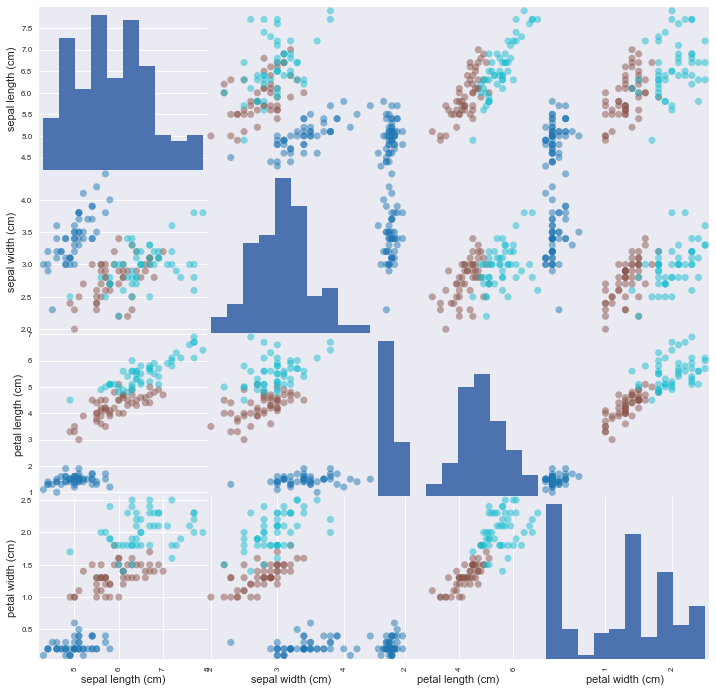

In [22]:
# padnasの散布図作成機能のimport
from pandas.plotting import scatter_matrix

# 各要素ごとの関係性を可視化する。
# 同一要素ごとはヒストグラムで表示される。
scatter_matrix(df_X, c=iris.target, figsize=(12, 12), s=200 , cmap=plt.cm.Vega10)

plt.show()

In [18]:
def my_scatter(df_X, target, name1, name2):    
    """
    描画用の関数。
    """
    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.scatter(df_X[name1], df_X[name2], c=target, cmap=plt.cm.Vega10)

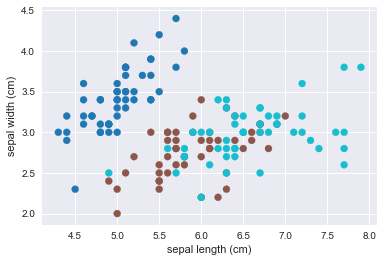

In [23]:
# がく片の長さと幅の関係を散布図でプロットする。
# この二つの特徴量のみで3種類を分類するのは難しそう。
my_scatter(df_X, iris.target, "sepal length (cm)", "sepal width (cm)")

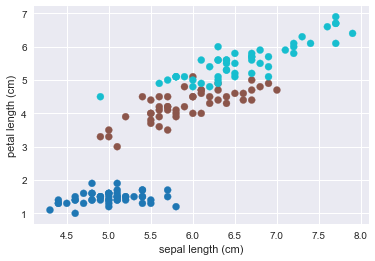

In [24]:
# がく片の長さと花弁の長さの関係を散布図でプロットする。
# この二つの特徴量のみである程度3種類に分類することができそう。
my_scatter(df_X, iris.target, "sepal length (cm)","petal length (cm)")

# 学習
可視化により、データの特性を掴んだ後に実際に学習を行う。
ここでは以下のアルゴリズムを示す。

なお、今回は**可視化して見やすくする関係上、特徴量（説明変数）は二つのみ使用する**。
（特徴量（説明変数）を増やした方が精度は高くなる）。

### 使用するアルゴリズム
* k-最近傍法
* ロジスティック回帰
* SVM

## 前処理
新たに計測したアイリスに対して、その種類を予測するのが分類である。

新たに計測したデータに適用する前に、そのモデルが実際に機能するかをテストする必要がある。
そこで、データを訓練用とテスト用に分ける。

In [26]:
# 分類用の関数
from sklearn.model_selection import train_test_split

# 訓練用とテスト用に分類
# 特徴量は0番目(sepal length)と2番目（petal length）を使用する
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,[0,2]], iris.target)

# 特徴量は（データの数, 特徴量の数）が表示される
print(f"X_train shape:{X_train.shape}")
print(f"X_test shape:{X_test.shape}")
# 目的変数は（データの数）が表示される
print(f"y_train shape:{y_train.shape}")
print(f"y_test shape:{y_test.shape}")

X_train shape:(112, 2)
X_test shape:(38, 2)
y_train shape:(112,)
y_test shape:(38,)


In [27]:
def my_mesh(model, X, y, x_min, x_max, y_min, y_max):
    """
    メッシュ表示する関数
    """
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

    result_all_mesh = model.predict(np.array([xx.reshape(-1), yy.reshape(-1)]).T)
    result_all_mesh = result_all_mesh.reshape(xx.shape)

    plt.pcolormesh(xx, yy, result_all_mesh, cmap=plt.cm.Accent)
    plt.scatter(X[:,0], X[:, 1], c=y, edgecolors='K', cmap=plt.cm.Accent)
    plt.show()

## k-近傍法

あるオブジェクトを、k個の近接したオブジェクト群で最も多いクラスに分類する

In [39]:
# K最近傍法のクラスを取得
from sklearn.neighbors import KNeighborsClassifier

# モデル作成
model = KNeighborsClassifier()

# 学習
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

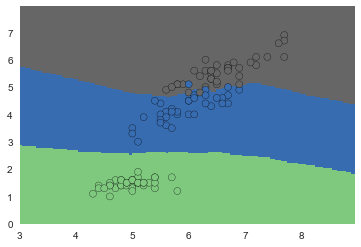

In [40]:
# 可視化
# 学習に使用したデータ
my_mesh(model, X_train, y_train, 3, 9, 0, 8)


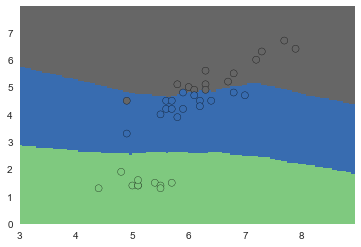

In [41]:
# 可視化
# テスト用のデータがどのように分類されたか
my_mesh(model, X_test, y_test, 3, 9, 0, 8)

In [42]:
# モデルの評価
model.score(X_test, y_test)

0.92105263157894735

## ロジスティック回帰
* パーセプトロンと似た原理
* そのクラスに所属する確率値が出せる
* シグモイド関数、Cross-entropy Error Function、正則化項

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_test,y_test)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

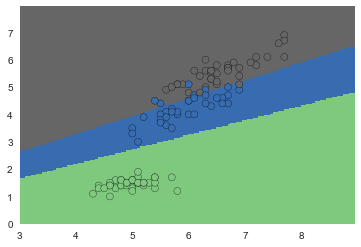

In [33]:
# 可視化
# 学習に使用したデータ
my_mesh(model, X_train, y_train, 3, 9, 0, 8)

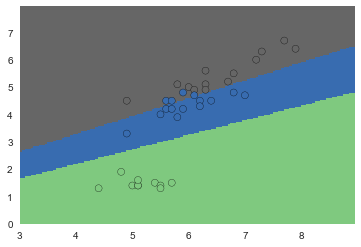

In [34]:
# 可視化
# テスト用のデータがどのように分類されたか
my_mesh(model, X_test, y_test, 3, 9, 0, 8)

In [165]:
# モデルの評価
model.score(X_test, y_test)

0.8947368421052632

## SVM（Support Vector Machine）
* マージンを最大化してなめらかな超平面を学習できる
* カーネルにより、非線形なデータも分類可能

In [43]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_test, y_test)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

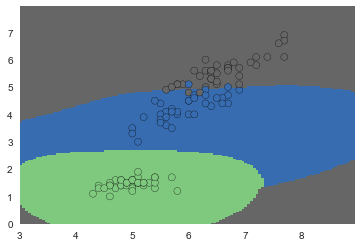

In [44]:
# 可視化
# 学習に使用したデータ
my_mesh(model, X_train, y_train, 3, 9, 0, 8)

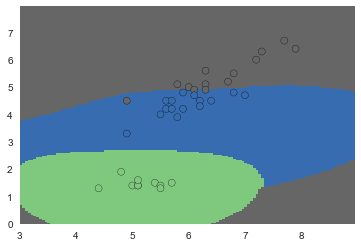

In [47]:
# 可視化
# テスト用のデータがどのように分類されたか
my_mesh(model, X_test, y_test, 3, 9, 0, 8)

In [48]:
# モデルの評価
model.score(X_test, y_test)

0.92105263157894735